In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt 
from glob import glob

In [2]:
parasitized_files = glob("archive/cell_images/Parasitized/*")
uninfected_files = glob("archive/cell_images/Uninfected/*")

In [3]:
print(len(parasitized_files))
print(len(uninfected_files))

13780
13780


In [13]:
im_size = [112,112, 3]
resnet = ResNet50(include_top=False, weights='imagenet', input_shape=im_size)
resnet.trainable=True

In [14]:
#!python build_dataset.py

In [15]:
model = Sequential()
model.add(resnet)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 4, 4, 2048)        23587712  
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               16777728  
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 1026      
Total params: 40,366,466
Trainable params: 16,778,754
Non-trainable params: 23,587,712
_________________________________________________________________


In [18]:
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [9]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [10]:
training_set = train_datagen.flow_from_directory('dataset/training/',
                                                 target_size = (112, 112),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 19842 images belonging to 2 classes.


In [11]:
test_set = test_datagen.flow_from_directory('dataset/testing/',
                                                 target_size = (112, 112),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5512 images belonging to 2 classes.


In [19]:
r=model.fit(training_set,
          epochs=5,
          steps_per_epoch=len(training_set),
          validation_data=test_set,
          validation_steps=len(test_set)
          )
          

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 621 steps, validate for 173 steps
Epoch 1/5
621/621 [==============================] - 191s 308ms/step - loss: 0.5905 - accuracy: 0.9092 - val_loss: 1.1426 - val_accuracy: 0.5054
Epoch 2/5
621/621 [==============================] - 186s 300ms/step - loss: 0.1935 - accuracy: 0.9427 - val_loss: 0.1986 - val_accuracy: 0.9412
Epoch 3/5
621/621 [==============================] - 186s 300ms/step - loss: 0.1600 - accuracy: 0.9512 - val_loss: 0.1304 - val_accuracy: 0.9595
Epoch 4/5
621/621 [==============================] - 186s 300ms/step - loss: 0.1444 - accuracy: 0.9548 - val_loss: 0.1196 - val_accuracy: 0.9608
Epoch 5/5
621/621 [==============================] - 187s 301ms/step - loss: 0.1490 - accuracy: 0.9548 - val_loss: 0.3727 - val_accuracy: 0.9512


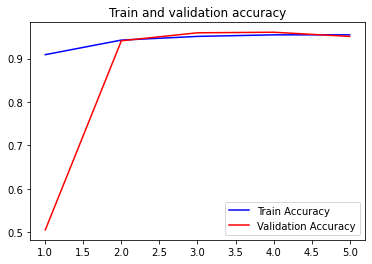

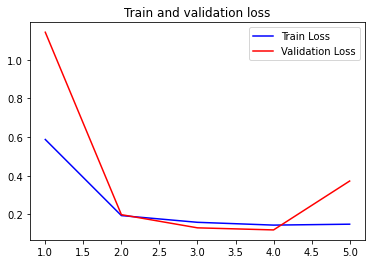

In [21]:
train_accs = r.history['accuracy']
train_losses = r.history['loss']
val_accs = r.history['val_accuracy']
val_losses = r.history['val_loss']

epochs = range(1, len(train_accs)+1)

plt.plot(epochs,train_accs, 'b', label='Train Accuracy')
plt.plot(epochs,val_accs, 'r', label='Validation Accuracy')
plt.title('Train and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs,train_losses, 'b', label='Train Loss')
plt.plot(epochs,val_losses, 'r', label='Validation Loss')
plt.title('Train and validation loss')
plt.legend()

plt.show()

In [26]:
model.save('final_model')

INFO:tensorflow:Assets written to: final_model\assets


In [27]:
model.save('final_model.h5')

In [29]:
val_datagen = ImageDataGenerator(rescale = 1./255)
val_set = val_datagen.flow_from_directory('dataset/validation/',
                                                 target_size = (112, 112),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2204 images belonging to 2 classes.


In [32]:
model.evaluate_generator(val_set, len(val_set) )[1]

  ...
    to  
  ['...']


0.9505445